In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/spam.csv')
df.sample(5)

,Category,Message
4027,ham,Oh ok.. Wat's ur email?
4565,ham,Tell me again what your address is
424,spam,URGENT! Your Mobile number has been awarded wi...
4186,ham,I'm good. Have you registered to vote?
3764,ham,K.i will send in &lt;#&gt; min:)


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [ ]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
df.duplicated().sum()

415

In [ ]:
df=df.drop_duplicates(keep='first')

<Axes: xlabel='Category', ylabel='count'>

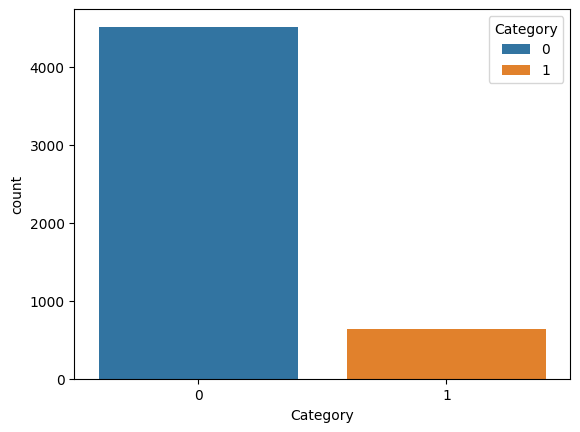

In [ ]:
sns.countplot(data=df,x='Category',hue='Category')

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Category'] = le.fit_transform(df['Category'])
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(df['Message'],df['Category'],test_size=0.2)
X_train.shape
X_test.shape

(1032,)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df=1,lowercase=True,stop_words='english')
X_train_features = tfidf.fit_transform(X_train).toarray()
X_test_features = tfidf.transform(X_test).toarray()
X_train_features


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(X_train_features,Y_train)
Y_pred1=gnb.predict(X_test_features)
model1_accuracy_score = print(accuracy_score(Y_test,Y_pred1))
model1_precision_score = print(precision_score(Y_test,Y_pred1))

0.8808139534883721
0.5251141552511416


In [ ]:
mnb.fit(X_train_features,Y_train)
Y_pred1=mnb.predict(X_test_features)
model2_accuracy_score = print(accuracy_score(Y_test,Y_pred1))
model2_precision_score = print(precision_score(Y_test,Y_pred1))

0.9612403100775194
1.0


In [ ]:
bnb.fit(X_train_features,Y_train)
Y_pred1=bnb.predict(X_test_features)
model3_accuracy_score = print(accuracy_score(Y_test,Y_pred1))
model3_precision_score = print(precision_score(Y_test,Y_pred1))

0.9680232558139535
1.0


In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [ ]:
X=[model1_accuracy_score,model2_accuracy_score,model3_accuracy_score] #accuracy score for naive bayes classifier
Y=[model1_precision_score,model2_precision_score,model3_precision_score] #precision score for naive bayes classifier

In [ ]:
data = {'Classifier': ['gnb', 'mnb', 'bnb'],
        'Accuracy': [0.881, 0.961, 0.968],
        'Precision': [0.525, 1.0, 1.0]}
df = pd.DataFrame(data)